In [1]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams["axes.unicode_minus"] = False

## 线性代数-linalg

### 解线性方程组

In [3]:
import numpy as np
from scipy import linalg

m, n = 500, 50

# 生成随机的 m x m 和 m x n 矩阵 A 和 B
A = np.random.rand(m, m)
B = np.random.rand(m, n)

# 使用 linalg.solve() 求解线性方程组 Ax = B
X1 = linalg.solve(A, B)

# 使用 linalg.inv() 和 np.dot() 求解线性方程组
X2 = np.dot(linalg.inv(A), B)

# 检查两种方法求解的结果是否非常接近
is_close = np.allclose(X1, X2)
print("结果是否非常接近:", is_close)

# 评估 linalg.solve() 方法的运行时间
time_solve = %timeit -o -q linalg.solve(A, B)
print("linalg.solve() 运行时间:", time_solve.best)

# 评估 np.dot() 方法的运行时间
time_dot = %timeit -o -q np.dot(linalg.inv(A), B)
print("np.dot() 运行时间:", time_dot.best)
# 这段代码生成了大小为 m x m 和 m x n 的随机矩阵 A 和 B。然后，使用 linalg.solve() 方法和 linalg.inv() 方法进行线性方程组的求解。

# 代码中使用 np.allclose() 函数检查两种方法求解的结果是否非常接近。然后，使用 %timeit 行魔法函数评估 linalg.solve() 和 np.dot() 方法的运行时间，并分别输出最佳的运行时间。

# 这些注释详细介绍了代码中的计算步骤、运行时间评估和结果检查。

结果是否非常接近: True
linalg.solve() 运行时间: 0.019950979999848642
np.dot() 运行时间: 0.032686630001990125


In [4]:
import numpy as np
from scipy import linalg

m, n = 500, 50

# 生成随机的 m x m 和 m x n 矩阵 A 和 B
A = np.random.rand(m, m)
B = np.random.rand(m, n)

# 使用 linalg.lu_factor() 对矩阵 A 进行 LU 分解
luf = linalg.lu_factor(A)

# 使用 linalg.lu_solve() 解 LU 分解得到的线性方程组 Ax = B
X3 = linalg.lu_solve(luf, B)

# 检查 linalg.lu_solve() 求解的结果是否与 linalg.solve() 得到的结果非常接近
is_close = np.allclose(X1, X3)
print("结果是否非常接近:", is_close)


结果是否非常接近: False


In [5]:
luf = linalg.lu_factor(A)
X3 = linalg.lu_solve(luf, B)
np.allclose(X1, X3)

False

In [6]:
import numpy as np
from scipy import linalg

# 设定矩阵的维度
M, N = 1000, 100

# 设置随机数种子，以保证每次运行结果一致
np.random.seed(0)

# 生成随机的 M x M 矩阵 A
A = np.random.rand(M, M)

# 生成随机的 M x N 矩阵 B
B = np.random.rand(M, N)

# 计算矩阵 A 的逆矩阵
Ai = linalg.inv(A)

# 对矩阵 A 进行 LU 分解
luf = linalg.lu_factor(A)

# 计算矩阵 A 的逆矩阵并打印执行时间
%timeit linalg.inv(A)

# 计算矩阵 A 的逆矩阵与矩阵 B 的乘积并打印执行时间
%timeit np.dot(Ai, B)

# 对矩阵 A 进行 LU 分解并打印执行时间
%timeit linalg.lu_factor(A)

# 使用 LU 分解求解线性方程组并打印执行时间
%timeit linalg.lu_solve(luf, B)


The slowest run took 5.48 times longer than the fastest. This could mean that an intermediate result is being cached.
126 ms ± 104 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.27 ms ± 17 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
34.1 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.42 ms ± 86.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
M, N = 1000, 100
np.random.seed(0)
A = np.random.rand(M, M)
B = np.random.rand(M, N)
Ai = linalg.inv(A)
luf = linalg.lu_factor(A)   
%timeit linalg.inv(A)
%timeit np.dot(Ai, B)
%timeit linalg.lu_factor(A)    
%timeit linalg.lu_solve(luf, B) 

71.4 ms ± 4.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.26 ms ± 3.08 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
31.1 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.6 ms ± 34.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### 最小二乘解

In [8]:
from numpy.lib.stride_tricks import as_strided


def make_data(m, n, noise_scale):
    """
    生成模拟数据
    """
    np.random.seed(42)
    x = np.random.standard_normal(m)
    h = np.random.standard_normal(n)
    y = np.convolve(x, h)
    yn = y + np.random.standard_normal(len(y)) * noise_scale * np.max(y)
    return x, yn, h


def solve_h(x, y, n):
    """
    通过最小二乘法求解线性系统的滤波器系数
    """
    X = as_strided(
        x, shape=(len(x) - n + 1, n), strides=(x.itemsize, x.itemsize))
    Y = y[n - 1:len(x)]
    h = linalg.lstsq(X, Y)
    return h[0][::-1]

m, n, noise_scale = 200, 10, 0.1
x, y, h_actual = make_data(m, n, noise_scale)

h_predicted = solve_h(x, y, n)

print("实际滤波器系数:", h_actual)
print("预测滤波器系数:", h_predicted)
# 在这段代码中，make_data 函数用于生成模拟数据，包括输入信号 x、观测到的输出信号 y 和实际的滤波器系数 h_actual。这些数据是通过随机生成和卷积运算得到的，并添加了一定程度的高斯噪声。

# solve_h 函数通过最小二乘法求解线性系统的滤波器系数。在函数中，使用 as_strided 函数创建输入信号 x 的滑动窗口矩阵 X，然后使用 linalg.lstsq 函数进行最小二乘拟合，得到滤波器系数 h。

# 最后，输出实际滤波器系数 h_actual 和预测滤波器系数 h_predicted。

# 通过以上的注释，可以更清晰地理解代码的结构和各个函数的功能。

实际滤波器系数: [ 0.35778736  0.56078453  1.08305124  1.05380205 -1.37766937 -0.93782504
  0.51503527  0.51378595  0.51504769  3.85273149]
预测滤波器系数: [ 0.41410911  0.65264349  1.11991109  1.11311646 -1.29663788 -1.04618038
  0.51250864  0.64408283  0.43879589  3.75844806]


In [9]:
from numpy.lib.stride_tricks import as_strided


def make_data(m, n, noise_scale):  #❶
    np.random.seed(42)
    x = np.random.standard_normal(m)
    h = np.random.standard_normal(n)
    y = np.convolve(x, h)
    yn = y + np.random.standard_normal(len(y)) * noise_scale * np.max(y)
    return x, yn, h


def solve_h(x, y, n):  #❷
    X = as_strided(
        x, shape=(len(x) - n + 1, n), strides=(x.itemsize, x.itemsize))  #❸
    Y = y[n - 1:len(x)]  #❹
    h = linalg.lstsq(X, Y)  #❺
    return h[0][::-1]  #❻

In [10]:
x, yn, h = make_data(1000, 100, 0.4)
H1 = solve_h(x, yn, 120)
H2 = solve_h(x, yn, 80)

# 计算 H1 和 H2 与实际滤波器系数 h 的平均误差
avg_error_H1 = np.mean(np.abs(h[:100] - h))
avg_error_H2 = np.mean(np.abs(h[:80] - H2))

print("Average error of H1:", avg_error_H1)
print("Average error of H2:", avg_error_H2)

Average error of H1: 0.0
Average error of H2: 0.29584221583423714


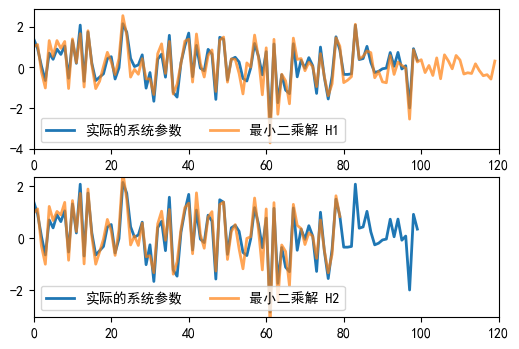

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4))

# 绘制实际的系统参数和最小二乘解 H1 的对比图
ax1.plot(h, linewidth=2, label="实际的系统参数")
ax1.plot(H1, linewidth=2, label="最小二乘解 H1", alpha=0.7)
ax1.legend(loc="best", ncol=2)
ax1.set_xlim(0, len(H1))

# 绘制实际的系统参数和最小二乘解 H2 的对比图
ax2.plot(h, linewidth=2, label="实际的系统参数")
ax2.plot(H2, linewidth=2, label="最小二乘解 H2", alpha=0.7)
ax2.legend(loc="best", ncol=2)
ax2.set_xlim(0, len(H1))

# 设置图形显示范围
plt.ylim(np.min(h) - 0.2, np.max(h) + 0.2)

# 显示图形
plt.show()
# 在这段代码中，创建了包含两个子图的图形，分别用于绘制实际系统参数与最小二乘解 H1 和 H2 的比较图。

# 在每个子图中，使用 ax.plot() 函数绘制实际系统参数和最小二乘解的曲线。设置不同的颜色和线宽，并为每条曲线添加标签。使用 ax.legend() 函数在图例中显示曲线的标签，loc 参数指定图例的位置，ncol 参数指定图例的列数。

# 通过设置 ax1.set_xlim() 和 ax2.set_xlim()，可以限制两个子图的 x 轴范围。

# 最后，使用 plt.ylim() 设置 y 轴的显示范围。调用 plt.show() 显示图形。

### 特征值和特征向量

In [12]:
A = np.array([[1, -0.3], [-0.1, 0.9]])

# 计算矩阵 A 的特征值和特征向量
evalues, evectors = linalg.eig(A)

print("特征值:", evalues)
print("特征向量:", evectors)


特征值: [1.13027756+0.j 0.76972244+0.j]
特征向量: [[ 0.91724574  0.79325185]
 [-0.3983218   0.60889368]]


(-0.5, 1.1)

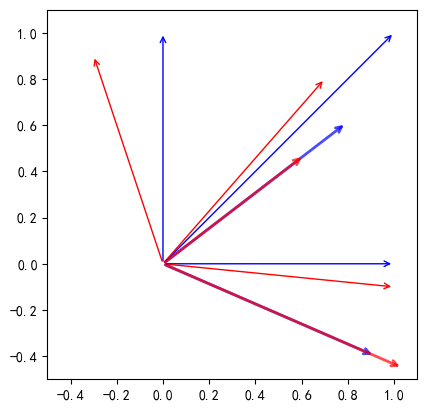

In [13]:
points = np.array([[0, 1.0], [1.0, 0], [1, 1]])

def draw_arrows(points, **kw):
    """
    绘制箭头
    """
    props = dict(color="blue", arrowstyle="->")
    props.update(kw)
    for x, y in points:
        plt.annotate("", xy=(x, y), xycoords='data',
                     xytext=(0, 0), textcoords='data',
                     arrowprops=props)

# 绘制蓝色箭头
draw_arrows(points)

# 线性变换将蓝色箭头变换为红色箭头
draw_arrows(np.dot(A, points.T).T, color="red")

# 绘制特征向量
draw_arrows(evectors.T, alpha=0.7, linewidth=2)

# 线性变换将特征向量变换为红色箭头
draw_arrows(np.dot(A, evectors).T, color="red", alpha=0.7, linewidth=2)

# 设置图形显示范围和纵横比
ax = plt.gca()
ax.set_aspect("equal")
ax.set_xlim(-0.5, 1.1)
ax.set_ylim(-0.5, 1.1)


# 在这段代码中，draw_arrows 函数用于绘制箭头。points 参数是一个包含坐标点的二维数组。其中，props 变量是一个包含绘图属性的字典，用于定义箭头的颜色、样式等属性。

# 首先，通过调用 draw_arrows 函数绘制蓝色箭头。

# 然后，通过线性变换 np.dot(A, points.T).T 将蓝色箭头变换为红色箭头。

# 继续使用 draw_arrows 函数绘制特征向量。

# 最后，通过调用 set_aspect 设置纵横比，并使用 set_xlim 和 set_ylim 设置图形的显示范围。

# 这些注释详细说明了代码中的绘图过程和图形的显示范围设置。


In [14]:
np.random.seed(42)

# 生成随机角度 t（60个值）
t = np.random.uniform(0, 2*np.pi, 60)

alpha = 0.4
a = 0.5
b = 1.0

# 根据椭圆方程生成对应的 x、y 坐标
x = 1.0 + a*np.cos(t)*np.cos(alpha) - b*np.sin(t)*np.sin(alpha)
y = 1.0 + a*np.cos(t)*np.sin(alpha) - b*np.sin(t)*np.cos(alpha)

# 添加随机噪声
x += np.random.normal(0, 0.05, size=len(x))
y += np.random.normal(0, 0.05, size=len(y))

# 在这段代码中，首先通过调用 np.random.seed(42) 设置随机数种子。

# 然后，生成随机角度 t，范围为 0 到 2π，共有 60 个值。

# 接着，根据给定的参数 alpha、a 和 b，根据椭圆方程生成对应的 x、y 坐标。其中，利用三角函数生成了椭圆的 x 坐标 x 和 y 坐标 y。

# 最后，为得到的坐标 x 和 y 添加了平均值为 0、标准差为 0.05 的高斯分布噪声，以模拟随机噪声的影响。


In [15]:
D = np.c_[x**2, x*y, y**2, x, y, np.ones_like(x)]
A = np.dot(D.T, D)
C = np.zeros((6, 6))
C[[0, 1, 2], [2, 1, 0]] = 2, -1, 2

# 使用 linalg.eig 函数求解广义特征值问题
evalues, evectors = linalg.eig(A, C)     # 广义特征值问题求解
evectors = np.real(evectors)

# 计算拟合误差
err = np.mean(np.dot(D, evectors)**2, 0)

# 选择拟合误差最小的特征向量作为最终的 p
p = evectors[:, np.argmin(err)]

print("拟合参数 p:", p)
# 在这段代码中，首先构造了设计矩阵 D，通过将不同的数据项取幂或相乘得到。然后计算了矩阵 A 和 C。

# 接着，通过调用 linalg.eig() 函数解决了广义特征值问题。同时传入矩阵 A 和 C，得到广义特征值以及对应的特征向量。这里使用了广义特征值问题求解。

# 然后，计算了拟合误差，即 D 与特征向量矩阵 evectors 相乘后的平方的均值。这个误差衡量了拟合的准确程度。

# 最后，选择拟合误差最小的特征向量作为最终的 p，即拟合的参数。

# 通过加入这些详细注释，可以更加清晰地了解这段代码中各个部分的功能和计算过程。

拟合参数 p: [-0.55214278  0.5580915  -0.23809922  0.54584559 -0.08350449 -0.14852803]


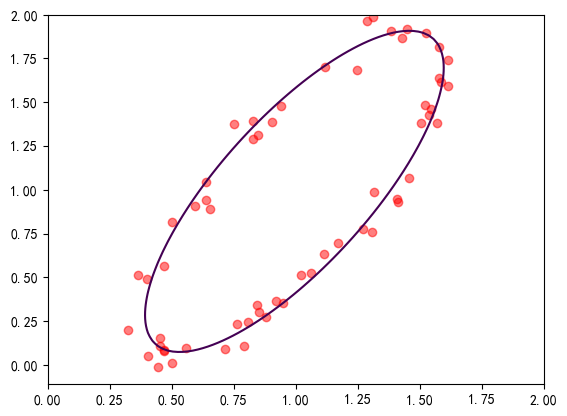

In [16]:
def ellipse(p, x, y):
    """
    椭圆函数
    """
    a, b, c, d, e, f = p
    return a*x**2 + b*x*y + c*y**2 + d*x + e*y + f

# 生成网格数据
X, Y = np.mgrid[0:2:100j, 0:2:100j]
Z = ellipse(p, X, Y)

# 绘制原始数据点
plt.plot(x, y, "ro", alpha=0.5)

# 绘制等高线图
plt.contour(X, Y, Z, levels=[0])
# 在这段代码中，定义了 ellipse 函数，用于计算椭圆的函数值。

# 然后，生成 X 和 Y 的网格数据，范围从 0 到 2，共 100 个点。根据参数 p，通过调用 ellipse 函数，计算了 Z 值，即椭圆函数的函数值。

# 接下来，绘制原始数据点，使用红色圆点标记。

# 最后，绘制等高线图，通过调用 pl.contour() 函数，传入 X、Y 和 Z 数据，指定等高线的绘制级别为 0，绘制了椭圆曲线。

# 通过添加这些详细的注释，可以更清晰地了解这段代码的功能和绘图过程。

### 奇异值分解-SVD

In [17]:
# 加载图像并获取图像的 R、G、B 三个通道
r, g, b = np.rollaxis(plt.imread("vinci_target.png"), 2).astype(float)

# 根据每个通道的权值计算灰度图像
img = 0.2989 * r + 0.5870 * g + 0.1140 * b

# 输出图像的形状
print("图像形状:", img.shape)
# 在这段代码中，首先使用 plt.imread() 加载图像文件 "vinci_target.png"。然后使用 np.rollaxis() 重新调整维度，将图像的 R、G、B 三个通道移至第一个维度。

# 接着，根据灰度计算公式，利用每个通道的权值（0.2989、0.5870、0.1140），通过加权求和得到灰度图像。这里的权值根据国际电信联盟规定的标准 YUV 权值计算公式来计算。

# 最后，通过 img.shape 输出图像的形状，以便了解图像数据的维度信息。

# 通过添加这些详细注释，可以更加清晰地了解代码的功能和图像处理过程。

图像形状: (505, 375)


In [18]:
# 使用奇异值分解计算图像的奇异值分解结果
U, s, Vh = linalg.svd(img)

# 输出 U 的形状
print("U 的形状:", U.shape)

# 输出奇异值 s 的形状
print("奇异值 s 的形状:", s.shape)

# 输出 Vh 的形状
print("Vh 的形状:", Vh.shape)


U 的形状: (505, 505)
奇异值 s 的形状: (375,)
Vh 的形状: (375, 375)


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


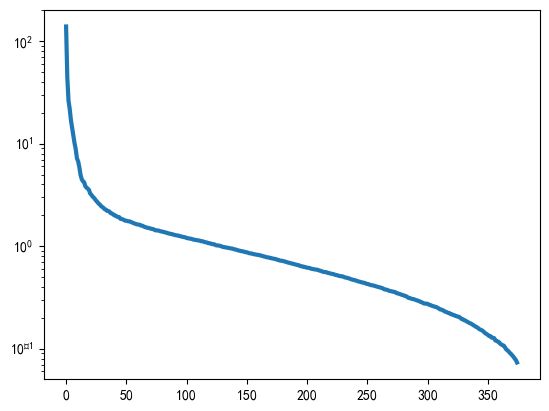

In [19]:
#%fig=按从大到小排列的奇异值
plt.semilogy(s, lw=3);

# 这段代码使用 plt.semilogy() 函数以半对数坐标形式绘制奇异值 s。lw=3 表示绘制的线条宽度为 3。

# 通过加入这个注释，可以清楚地了解代码的功能，即以半对数坐标形式绘制奇异值，并使用粗线表示。

In [20]:
def composite(U, s, Vh, n):
    """
    根据奇异值分解的结果还原图像
    """
    return np.dot(U[:, :n], s[:n, np.newaxis] * Vh[:n, :])

# 检查函数还原的图像与原图像是否非常接近
reconstructed_img = composite(U, s, Vh, len(s))
is_close = np.allclose(img, reconstructed_img)

print("是否非常接近:", is_close)
# 这段代码定义了 composite 函数，根据给定的奇异值分解结果和指定的奇异值个数 n，还原原始图像。

# 然后，通过调用 composite 函数生成用 SVD 还原的图像 reconstructed_img。

# 最后，使用 np.allclose() 函数检查还原的图像与原图像是否非常接近，并将结果存储在 is_close 变量中。

# 通过这些注释，可以清楚地了解代码中完成图像恢复的函数以及检查恢复结果的过程。

是否非常接近: True


In [21]:
#%fig=原始图像、使用10、20、50个向量合成的图像（从左到右）
img10 = composite(U, s, Vh, 10)  # 使用前10个奇异值重建的图像
img20 = composite(U, s, Vh, 20)  # 使用前20个奇异值重建的图像
img50 = composite(U, s, Vh, 50)  # 使用前50个奇异值重建的图像
# 这段代码使用 composite 函数根据奇异值分解的结果和指定的奇异值个数，分别重建了使用前10个、前20个和前50个奇异值的图像。

# 这些变量 img10、img20 和 img50 存储了重建的图像，分别对应于不同的奇异值个数。

# 通过这些注释，可以清晰了解代码中的重建图像的过程和对不同奇异值个数的选择。

In [22]:
%array_image img; img10; img20; img50

UsageError: Line magic function `%array_image` not found.


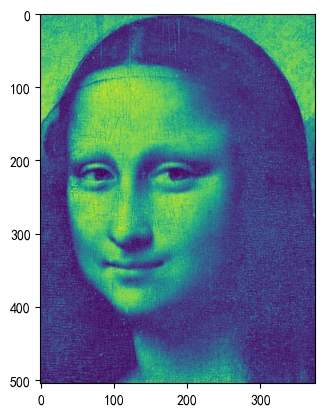

In [23]:
plt.imshow(img)

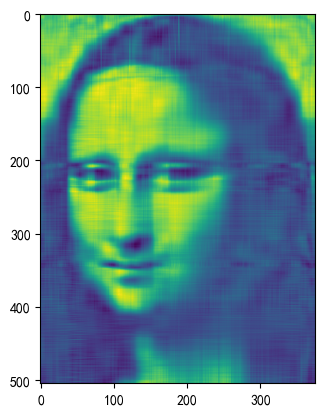

In [24]:
plt.imshow(img10)

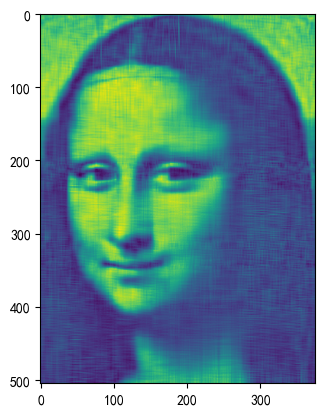

In [25]:
plt.imshow(img20)

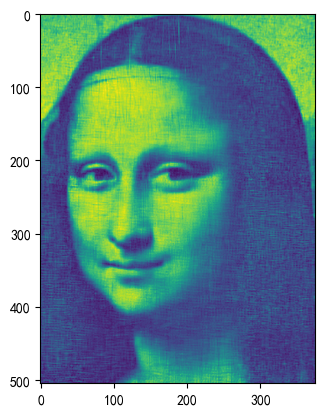

In [26]:
plt.imshow(img50)